In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt

In [3]:
train_image_generator = ImageDataGenerator(
  rescale = 1.0/255)
test_image_generator = ImageDataGenerator(
  rescale = 1.0/255)

In [11]:
training_iterator = train_image_generator.flow_from_directory('C:/Users/hp/Desktop/Covid19-dataset/train',
target_size = (300, 300),
batch_size = 16,
color_mode = 'grayscale')

Found 251 images belonging to 3 classes.


In [13]:
test_iterator = test_image_generator.flow_from_directory('C:/Users/hp/Desktop/Covid19-dataset/test',
target_size = (300, 300),
batch_size = 16,
color_mode = 'grayscale')

Found 66 images belonging to 3 classes.


In [14]:

model = Sequential()
model.add(layers.Input(shape = training_iterator.image_shape))
model.add(layers.Conv2D(16, 3, padding ='same', activation = 'relu'))
#model.add(layers.Dropout(0.1))
model.add(layers.MaxPooling2D())
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32, 3, padding = 'same', activation = 'relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
#model.add(layers.Dense(128,activation = 'relu'))
model.add(layers.Dense(3, activation = 'softmax'))

model.compile(
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
loss = tf.keras.losses.CategoricalCrossentropy(),
metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 300, 300, 16)      160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 150, 150, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 180000)            0         
                                                                 
 dense_1 (Dense)             (None, 3)                

In [15]:
batch_size = 16
history = model.fit(training_iterator, epochs = 10,  validation_data=test_iterator)

Epoch 1/10
16/16 [==============================] - 10s 613ms/step - loss: 6.6075 - accuracy: 0.4980 - val_loss: 0.6077 - val_accuracy: 0.6212
Epoch 2/10
16/16 [==============================] - 10s 598ms/step - loss: 0.3163 - accuracy: 0.8884 - val_loss: 0.3911 - val_accuracy: 0.8333
Epoch 3/10
16/16 [==============================] - 10s 595ms/step - loss: 0.1856 - accuracy: 0.9243 - val_loss: 0.2835 - val_accuracy: 0.8939
Epoch 4/10
16/16 [==============================] - 10s 592ms/step - loss: 0.0957 - accuracy: 0.9721 - val_loss: 0.3168 - val_accuracy: 0.8939
Epoch 5/10
16/16 [==============================] - 10s 594ms/step - loss: 0.0424 - accuracy: 0.9920 - val_loss: 0.4442 - val_accuracy: 0.8939
Epoch 6/10
16/16 [==============================] - 10s 609ms/step - loss: 0.0188 - accuracy: 0.9880 - val_loss: 0.3064 - val_accuracy: 0.9091
Epoch 7/10
16/16 [==============================] - 10s 597ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.3798 - val_accuracy: 0.9091

1/1 [==============================] - 0s 88ms/step
X_ray0
	Model prediction: [2.8337903e-11 9.9999857e-01 1.3988557e-06]
	True label: Normal (1)
	Correct: True


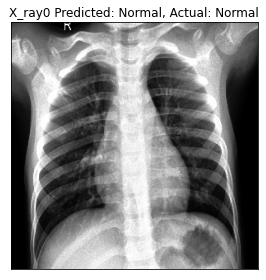

X_ray1
	Model prediction: [7.2062205e-05 1.8009369e-03 9.9812704e-01]
	True label: Pneumonia (2)
	Correct: True


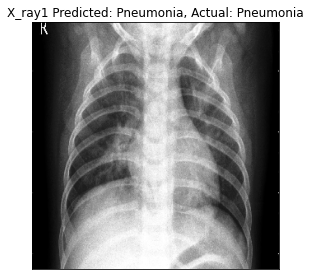

X_ray2
	Model prediction: [1.0000000e+00 1.2565211e-13 1.5706004e-15]
	True label: Covid (0)
	Correct: True


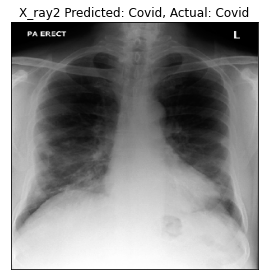

X_ray3
	Model prediction: [6.5106326e-01 3.5062537e-04 3.4858605e-01]
	True label: Pneumonia (2)
	Correct: False


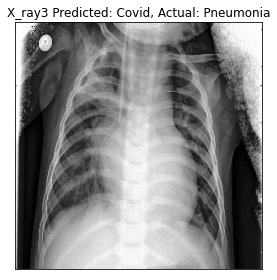

X_ray4
	Model prediction: [9.9999988e-01 3.8022822e-08 7.2701134e-08]
	True label: Covid (0)
	Correct: True


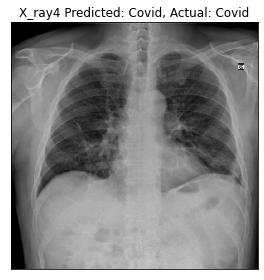

<Figure size 432x288 with 0 Axes>

In [16]:
from tensorflow import argmax
from tensorflow import expand_dims
from matplotlib import pyplot as plt


#Take matplotlib frame and remove axes.
def clean_plot(plot):
    plot.axes.get_xaxis().set_visible(False)
    plot.axes.get_yaxis().set_visible(False)

#Dict mapping from class numbers to string labels:
class_names = {
        0: "Covid",
        1: "Normal",
        2: "Pneumonia"
    }

#Loads a sample batch of data
sample_batch_input, sample_labels = test_iterator.next()
    
#Grabs the first five images
sample_batch_input = sample_batch_input[:5]
sample_labels = sample_labels[:5]

#Makes predictions using model.predict(x)
sample_predictions = model.predict(sample_batch_input)

#Iterate of images, predictions, and true labels
for i, (image, prediction, label) in enumerate(zip(sample_batch_input, sample_predictions, sample_labels)):

    image_name = "X_ray{}".format(i)

    #Gets predicted class with highest probability
    predicted_class = argmax(prediction).numpy()

    #Gets correct label
    actual_class = argmax(label).numpy()

    print(image_name)
    print("\tModel prediction: {}".format(prediction))
    print("\tTrue label: {} ({})".format(class_names[actual_class], actual_class))
    print("\tCorrect:", predicted_class == actual_class)

    #Saves image file using matplotlib
    sample_image = image
    clean_plot(plt.imshow(
    sample_image[:, :, 0],
    cmap = "gray"
        ))
    plt.title(image_name + " Predicted: {}, Actual: {}".format(class_names[predicted_class], class_names[actual_class]))
    plt.tight_layout()
    plt.show()
    plt.clf()